# Please key in your particulars here : 
## Name:
### Student Number:
 

In [48]:
# import the required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# for visualisation
import matplotlib.pyplot as plt 
%matplotlib inline

#import the required libraries
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
import seaborn as sns

# 1. Build Clustering Models using Numerical Data


### 1.1 Data exploration and manipulation

In [2]:
df = pd.read_csv("Bank_Data.csv")

In [3]:
df.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Savings account or bonds,Present employment since,Instalment rate in percentage of disposable income,Personal status and sex,Other debtors or guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Target
0,Salary assignments for at least 1 year,6,critical account/ other credits existing (not ...,radio/television,1169,Savings account,> 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,Salary assignments for at least 2 year,48,existing credits paid back duly till now,radio/television,5951,Savings account,1 - 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,None,yes,2
2,No Checking account,12,critical account/ other credits existing (not ...,education,2096,Savings account,4- 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,None,yes,1
3,Salary assignments for at least 1 year,42,existing credits paid back duly till now,furniture/equipment,7882,Savings account,4- 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,None,yes,1
4,Salary assignments for at least 1 year,24,delay in paying off in the past,car(new),4870,Savings account,1 - 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,None,yes,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Account Status                                            1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account or bonds                                  1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Instalment rate in percentage of disposable income        1000 non-null   int64 
 8   Personal status and sex      

In [5]:
df.describe()

,Duration in month,Credit amount,Instalment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
# 1000 entries
#cluster analysis based on data.

In [7]:
df.isnull().mean() # no missing values

Account Status                                              0.0
Duration in month                                           0.0
Credit History                                              0.0
Purpose                                                     0.0
Credit amount                                               0.0
Savings account or bonds                                    0.0
Present employment since                                    0.0
Instalment rate in percentage of disposable income          0.0
Personal status and sex                                     0.0
Other debtors or guarantors                                 0.0
Present residence since                                     0.0
Property                                                    0.0
Age in years                                                0.0
Other installment plans                                     0.0
Housing                                                     0.0
Number of existing credits at this bank 

Account Status


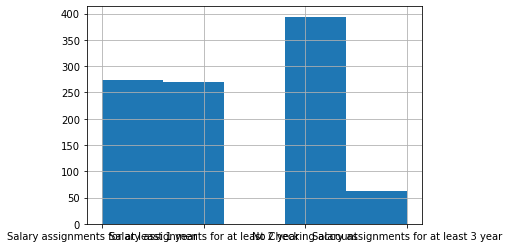

Duration in month


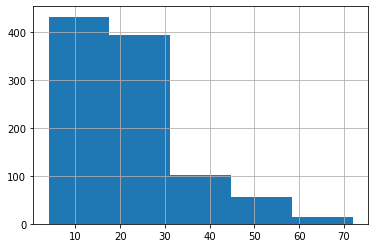

Credit History


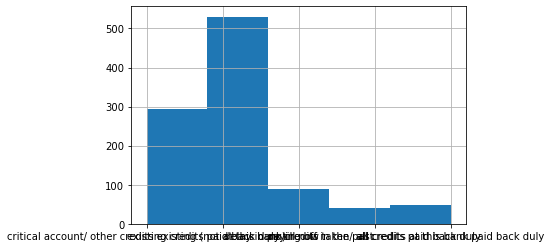

Purpose


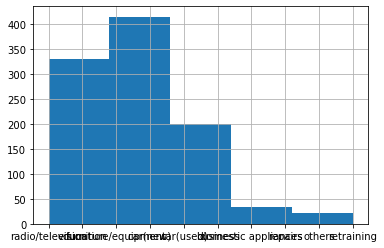

Credit amount


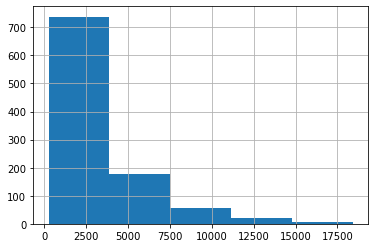

Savings account or bonds


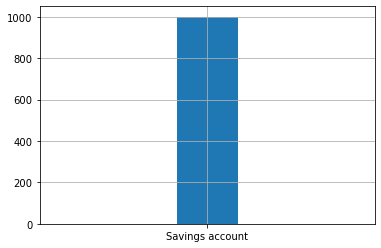

Present employment since


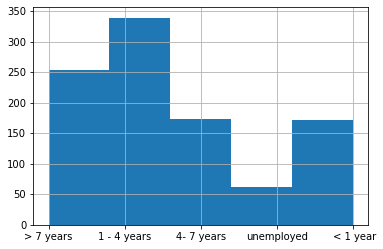

Instalment rate in percentage of disposable income


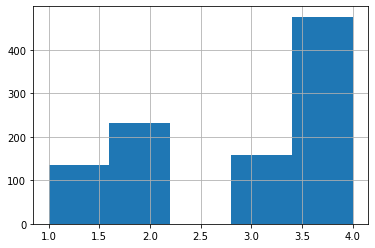

Personal status and sex


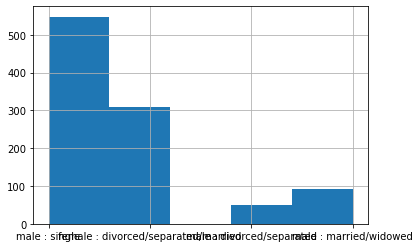

Other debtors or guarantors


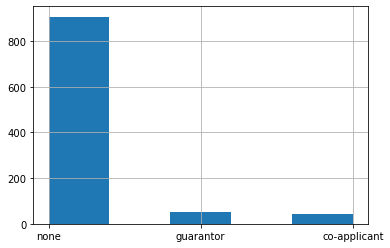

Present residence since


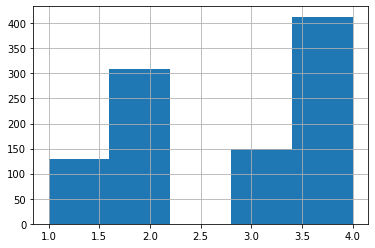

Property


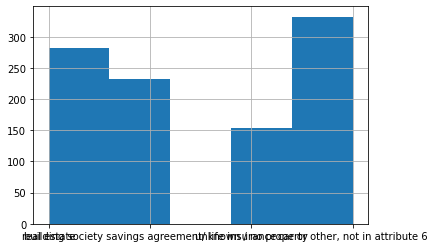

Age in years


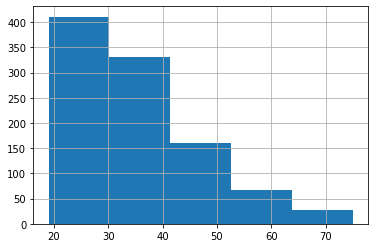

Other installment plans


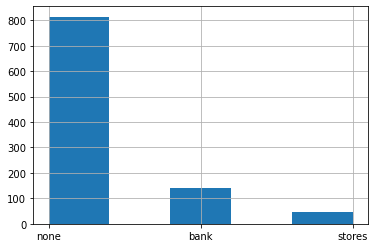

Housing


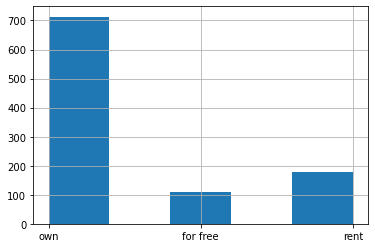

Number of existing credits at this bank


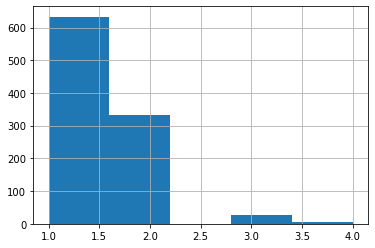

Job


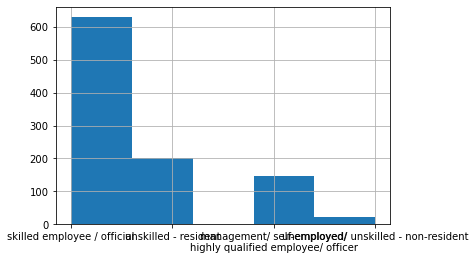

Number of people being liable to provide maintenance for


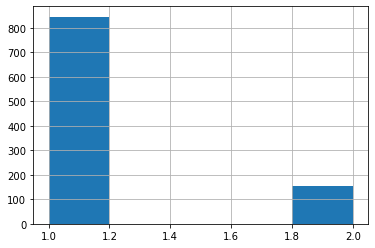

Telephone


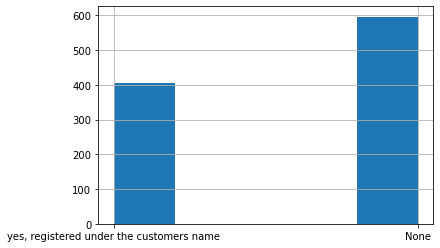

Foreign worker


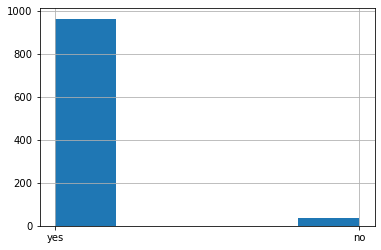

Target


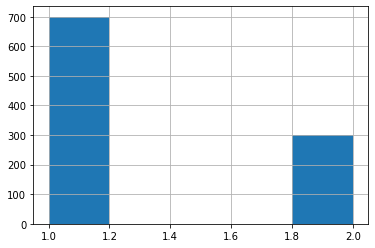

In [8]:
#shows histograms of all the columns. Doesnt really have any outliers.
col = df.columns.values.tolist()
for i in col:
    histoo = df[i].hist(bins=5)
    print(i)
    plt.show()

In [9]:
df[['Sex', 'Personal Status']] = df['Personal status and sex'].str.split(' : ', 1, expand=True)
df.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Savings account or bonds,Present employment since,Instalment rate in percentage of disposable income,Personal status and sex,Other debtors or guarantors,...,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Target,Sex,Personal Status
0,Salary assignments for at least 1 year,6,critical account/ other credits existing (not ...,radio/television,1169,Savings account,> 7 years,4,male : single,none,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,male,single
1,Salary assignments for at least 2 year,48,existing credits paid back duly till now,radio/television,5951,Savings account,1 - 4 years,2,female : divorced/separated/married,none,...,none,own,1,skilled employee / official,1,None,yes,2,female,divorced/separated/married
2,No Checking account,12,critical account/ other credits existing (not ...,education,2096,Savings account,4- 7 years,2,male : single,none,...,none,own,1,unskilled - resident,2,None,yes,1,male,single
3,Salary assignments for at least 1 year,42,existing credits paid back duly till now,furniture/equipment,7882,Savings account,4- 7 years,2,male : single,guarantor,...,none,for free,1,skilled employee / official,2,None,yes,1,male,single
4,Salary assignments for at least 1 year,24,delay in paying off in the past,car(new),4870,Savings account,1 - 4 years,3,male : single,none,...,none,for free,2,skilled employee / official,2,None,yes,2,male,single


In [10]:
# we will drop Savings Account as based on the Histogram everyone is of the same value, Foreign worker is mostly the same value nad personal status and de
df.drop(['Savings account or bonds','Foreign worker','Personal status and sex'],axis=1,inplace=True)
df.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Present employment since,Instalment rate in percentage of disposable income,Other debtors or guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Target,Sex,Personal Status
0,Salary assignments for at least 1 year,6,critical account/ other credits existing (not ...,radio/television,1169,> 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",1,male,single
1,Salary assignments for at least 2 year,48,existing credits paid back duly till now,radio/television,5951,1 - 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,None,2,female,divorced/separated/married
2,No Checking account,12,critical account/ other credits existing (not ...,education,2096,4- 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,None,1,male,single
3,Salary assignments for at least 1 year,42,existing credits paid back duly till now,furniture/equipment,7882,4- 7 years,2,guarantor,4,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,None,1,male,single
4,Salary assignments for at least 1 year,24,delay in paying off in the past,car(new),4870,1 - 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,None,2,male,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking account,12,existing credits paid back duly till now,furniture/equipment,1736,4- 7 years,3,none,4,real estate,31,none,own,1,unskilled - resident,1,None,1,female,divorced/separated/married
996,Salary assignments for at least 1 year,30,existing credits paid back duly till now,car(used),3857,1 - 4 years,4,none,4,building society savings agreement/ life insur...,40,none,own,1,management/ self-employed/\nhighly qualified e...,1,"yes, registered under the customers name",1,male,divorced/separated
997,No Checking account,12,existing credits paid back duly till now,radio/television,804,> 7 years,4,none,4,"car or other, not in attribute 6",38,none,own,1,skilled employee / official,1,None,1,male,single
998,Salary assignments for at least 1 year,45,existing credits paid back duly till now,radio/television,1845,1 - 4 years,4,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",2,male,single


In [11]:
df.columns

Index(['Account Status', 'Duration in month', 'Credit History', 'Purpose',
       'Credit amount', 'Present employment since',
       'Instalment rate in percentage of disposable income',
       'Other debtors or guarantors', 'Present residence since', 'Property',
       'Age in years', 'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'Target', 'Sex', 'Personal Status'],
      dtype='object')

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# specify which columns to apply the encoder to
columns_to_encode = ['Credit History', 'Purpose','Other debtors or guarantors','Property','Other installment plans','Housing','Job','Sex', 'Personal Status']

encoder = OneHotEncoder()

# create an instance of the ColumnTransformer class
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', encoder, columns_to_encode)
    ],
    remainder='passthrough'
)

# fit the preprocessor to your dataset
preprocessor.fit(df)

# use the transform method to perform one-hot encoding on the specified columns
encoded_data = preprocessor.transform(df)

In [13]:
encoded_data

array([[0.0, 1.0, 0.0, ..., 1,
        'yes, registered under the customers name', 1],
       [0.0, 0.0, 0.0, ..., 1, 'None', 2],
       [0.0, 1.0, 0.0, ..., 2, 'None', 1],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 'None', 1],
       [0.0, 0.0, 0.0, ..., 1,
        'yes, registered under the customers name', 2],
       [0.0, 1.0, 0.0, ..., 1, 'None', 1]], dtype=object)

In [47]:
ordinal_enc = OrdinalEncoder()
ordinal_enc.fit(encoded_data)

OrdinalEncoder()

In [15]:
X_train_enc = ordinal_enc.transform(encoded_data)
X_train_enc

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train_enc)
X_scaled

array([[-0.22699055,  1.55337352, -0.31063037, ..., -0.42828957,
         1.21459768, -0.65465367],
       [-0.22699055, -0.64376017, -0.31063037, ..., -0.42828957,
        -0.82331789,  1.52752523],
       [-0.22699055,  1.55337352, -0.31063037, ...,  2.33486893,
        -0.82331789, -0.65465367],
       ...,
       [-0.22699055, -0.64376017, -0.31063037, ..., -0.42828957,
        -0.82331789, -0.65465367],
       [-0.22699055, -0.64376017, -0.31063037, ..., -0.42828957,
         1.21459768,  1.52752523],
       [-0.22699055,  1.55337352, -0.31063037, ..., -0.42828957,
        -0.82331789, -0.65465367]])

In [17]:
#pip install -U threadpoolctl

In [18]:
kmeans=KMeans(n_clusters=10,n_init=20,max_iter=300,random_state=1)
kmeans.fit(X_scaled)
kmeans.cluster_centers_

C:\Users\Min\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([[-3.73945587e-03, -3.49158956e-02,  4.12359267e-01,
        -1.92877613e-01, -1.96746164e-02,  1.20051320e-01,
        -6.89245172e-02,  5.33165018e-01, -1.10207754e-01,
        -6.35730347e-02, -9.45973165e-02,  1.11092957e-01,
        -2.21107694e-01, -1.49982957e-01,  3.22763448e-02,
        -2.06767666e-01, -2.34205723e-01,  3.20212168e-01,
         2.12358789e-02,  3.95115828e-01, -3.58950321e-01,
        -9.28610289e-02, -1.87019640e-02, -1.41256524e-01,
         2.90276274e-01, -3.47960103e-01,  3.14840368e-01,
        -8.97912575e-02,  2.36539521e+00, -1.30487651e+00,
        -1.49982957e-01, -4.69879518e-01, -5.40027427e-01,
         5.40027427e-01,  3.23393263e-01, -5.40027427e-01,
        -1.93254002e-01,  4.72447136e-01, -1.14403922e-01,
         3.46764412e-01,  6.52663570e-01,  6.78014885e-01,
         1.42672613e-01, -2.33173375e-02,  2.11059571e-01,
         4.63050469e-02,  7.10764263e-02,  9.69065684e-01,
         1.34085692e-01],
       [-1.03458279e-01, -2.62

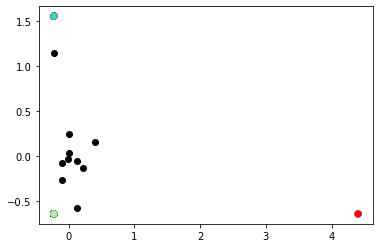

In [45]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.show()

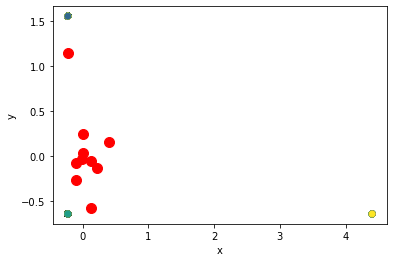

In [19]:
y_pred=kmeans.predict(X_scaled)

# Visualise the Clusters and their corresponding centroids in the below graph 
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = y_pred) 
plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

In [20]:
kmeans.inertia_

35518.11366895344

In [ ]:
#might indicate that this is not suitable for kmeans clustering.

### 1.2 K-Means Clustering

### 1.3 Hierarchical Clustering

In [23]:
X_scaled

array([[-0.22699055,  1.55337352, -0.31063037, ..., -0.42828957,
         1.21459768, -0.65465367],
       [-0.22699055, -0.64376017, -0.31063037, ..., -0.42828957,
        -0.82331789,  1.52752523],
       [-0.22699055,  1.55337352, -0.31063037, ...,  2.33486893,
        -0.82331789, -0.65465367],
       ...,
       [-0.22699055, -0.64376017, -0.31063037, ..., -0.42828957,
        -0.82331789, -0.65465367],
       [-0.22699055, -0.64376017, -0.31063037, ..., -0.42828957,
         1.21459768,  1.52752523],
       [-0.22699055,  1.55337352, -0.31063037, ..., -0.42828957,
        -0.82331789, -0.65465367]])

In [24]:
from scipy.spatial.distance import cdist
print(cdist(X_scaled,X_scaled))

[[ 0.          9.14381063  7.82370676 ...  5.81789158  8.60446659
   7.95065785]
 [ 9.14381063  0.          9.8655857  ...  7.92163739  7.77798564
   8.22045671]
 [ 7.82370676  9.8655857   0.         ...  8.3437604  10.36222196
   8.94076639]
 ...
 [ 5.81789158  7.92163739  8.3437604  ...  0.          7.02767036
   6.61217917]
 [ 8.60446659  7.77798564 10.36222196 ...  7.02767036  0.
   8.44621815]
 [ 7.95065785  8.22045671  8.94076639 ...  6.61217917  8.44621815
   0.        ]]


In [25]:
print(cdist(X_scaled,X_scaled).shape)

(1000, 1000)


In [26]:
Z=shc.linkage(X_scaled,method='ward')
Z

array([[9.00000000e+00, 3.20000000e+02, 1.96601054e-01, 2.00000000e+00],
       [6.05000000e+02, 7.43000000e+02, 2.19285791e-01, 2.00000000e+00],
       [4.56000000e+02, 5.86000000e+02, 5.89011710e-01, 2.00000000e+00],
       ...,
       [1.99300000e+03, 1.99500000e+03, 5.82320418e+01, 7.11000000e+02],
       [1.98700000e+03, 1.99400000e+03, 6.03239725e+01, 2.89000000e+02],
       [1.99600000e+03, 1.99700000e+03, 6.58750391e+01, 1.00000000e+03]])

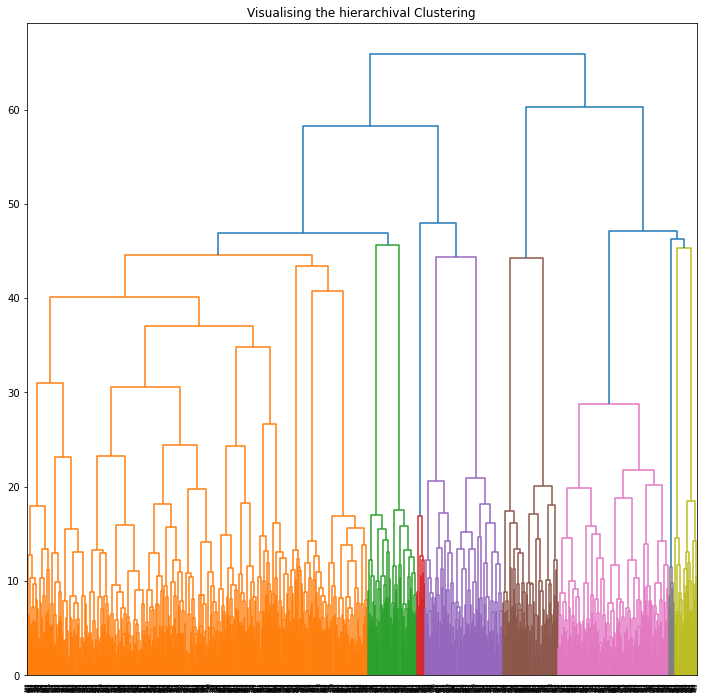

In [27]:
# generate dendrograms

plt.figure(figsize=(12,12))
plt.title('Visualising the hierarchival Clustering')
Dendrogram=shc.dendrogram(Z)

In [28]:
ac3=AgglomerativeClustering(n_clusters=3)
ac3

AgglomerativeClustering(n_clusters=3)

In [29]:
ac3.fit_predict(X_scaled)

array([0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1,

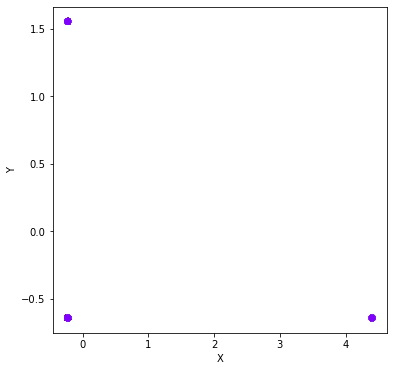

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0],X_scaled[:,1],
           c=ac3.fit_predict(X_scaled),cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
#silhouettescore

from sklearn.metrics import silhouette_score
silhouette_score(X_scaled,ac3.labels_)

0.06954244033592427

In [33]:
k_range=range(2,11)
silhouette_scores=[]
for i in k_range:
    ac_i=AgglomerativeClustering(n_clusters=i,linkage='ward')
    silhouette_scores.append(silhouette_score(X_scaled,ac_i.fit_predict(X_scaled)))

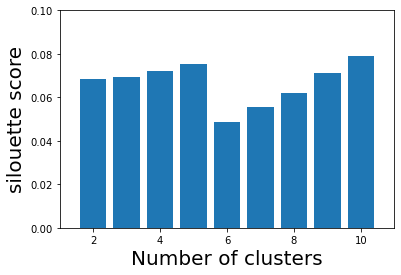

In [36]:
plt.bar(k_range,silhouette_scores)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('silouette score',fontsize=20)
plt.axis([1,11,0,0.1])
plt.show()

In [ ]:
#highest silouette score at 5 clusters.

In [39]:
ac5=AgglomerativeClustering(n_clusters=5)
ac5

AgglomerativeClustering(n_clusters=5)

In [40]:
ac5.fit_predict(X_scaled)

array([1, 0, 3, 2, 3, 3, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 2, 0, 1, 1, 1, 1, 1,
       3, 0, 1, 0, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 0, 0, 1, 4, 0, 3, 3, 1, 1, 1, 1, 0, 1, 0, 4, 1, 2, 0, 3,
       1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 0, 1, 1, 1, 1, 2, 1, 3,
       1, 3, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 2, 3, 0, 0,
       3, 1, 3, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       2, 3, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 4, 2, 1, 1, 1, 3, 3, 1, 0, 1, 2, 1, 1, 0,

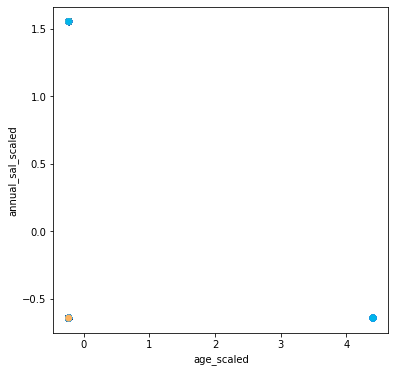

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0],X_scaled[:,1],
           c=ac5.fit_predict(X_scaled),cmap='rainbow')
plt.xlabel('age_scaled')
plt.ylabel('annual_sal_scaled')
plt.show()

In [42]:
silhouette_score(X_scaled,ac5.fit_predict(X_scaled))

0.07517706351853734